# Project 9: Data Preprocessing & Feature Engineering for Machine Learning (Housing Dataset)

## Data Import and first Inspection

In [2]:
import pandas as pd
df = pd.read_csv('housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

## Data Cleaning and Creating additional Features

In [4]:
#Drop na values
df = df.dropna(axis = 0)

In [5]:
#Add the additional Feature "rooms_per_household"
df['rooms_per_houshold'] = df['total_rooms']/df['households']

In [6]:
#Add the addtional feature "population_per_household"
df['population_per_household'] = df['population']/df['households']

In [7]:
#Add the additional feature "bedrooms_per_room"
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']

## Which Factors influence House Prices?

In [8]:
#Correlation between median_house value and all other features
df.corr()
#We can see that the median_income is the best predictor of median_house value.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_houshold,population_per_household,bedrooms_per_room
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.027307,0.002304,0.092657
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.106423,0.002522,-0.113815
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.153031,0.013258,0.136089
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.133482,-0.024596,-0.187900
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,-0.028355,0.084238
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.071898,0.070062,0.035319
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.080165,-0.027336,0.065087
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.325307,0.018894,-0.615661
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.151344,-0.023639,-0.255880
rooms_per_houshold,-0.027307,0.106423,-0.153031,0.133482,0.001538,-0.071898,-0.080165,0.325307,0.151344,1.000000,-0.004873,-0.416952


In [11]:
#Another way to see it
df.corr().median_house_value.sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688355
rooms_per_houshold          0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
latitude                   -0.144638
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

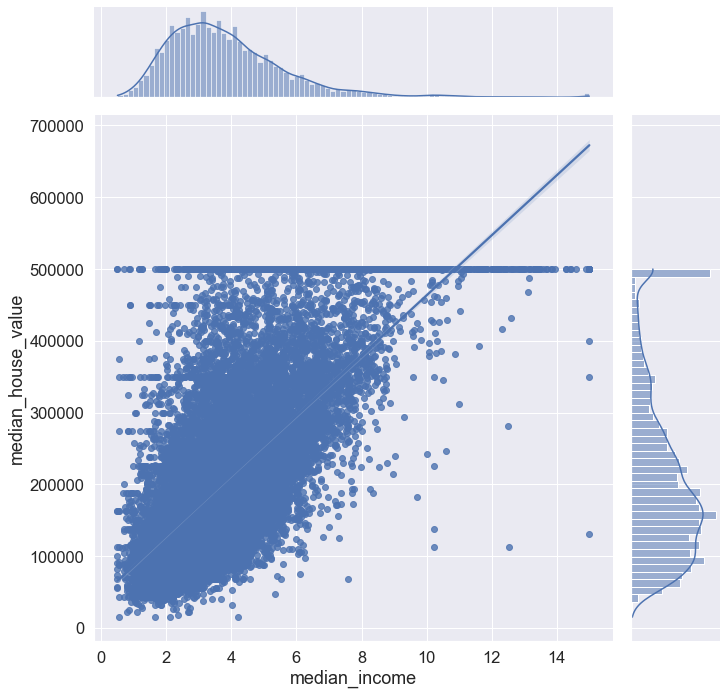

In [13]:
#Create a seaborn regression(jointplot) with income on the x-axis and house value on the y-axis.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1.5)
sns.jointplot(x = 'median_income', y = 'median_house_value', data = df, kind = 'reg', height = 10)
plt.show()

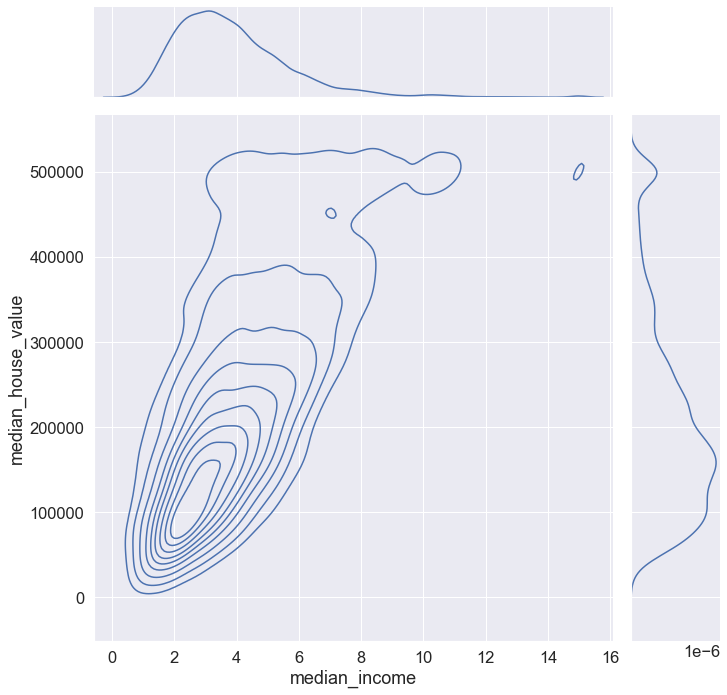

In [14]:
sns.set(font_scale = 1.5)
sns.jointplot(x = 'median_income', y = 'median_house_value', data = df, kind = 'kde', height = 10)
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

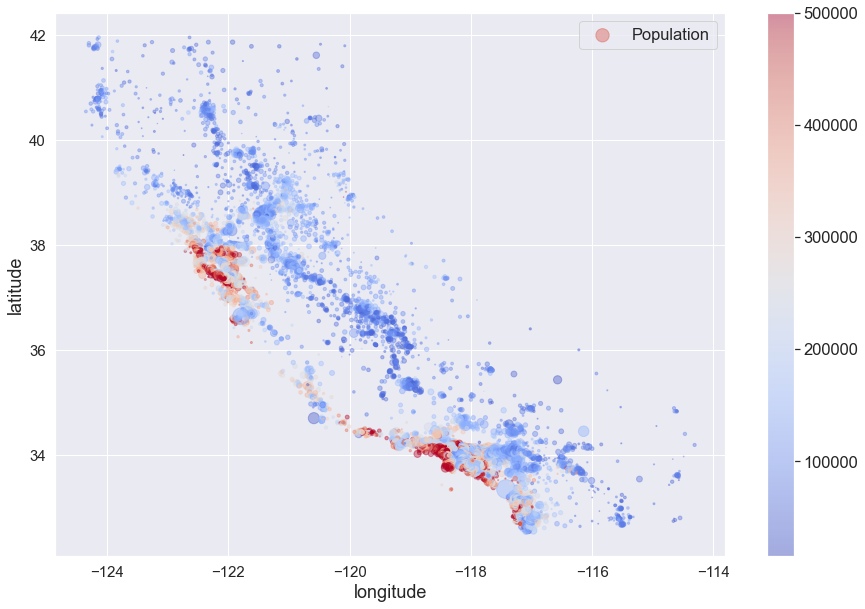

In [18]:
#Creating the following scatter(df.plot(kind = "scatter")) with
#- longitude on x-axis
#- latitude on y-axis
#- size (s) of data points determined by population
#- color (c) of data points determined by median_house_value

df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', s = df['population']/100, c = df['median_house_value'], cmap = 'coolwarm',
figsize = (15,10), fontsize = 15, colorbar = True, alpha = 0.4, sharex = False, label = 'Population')

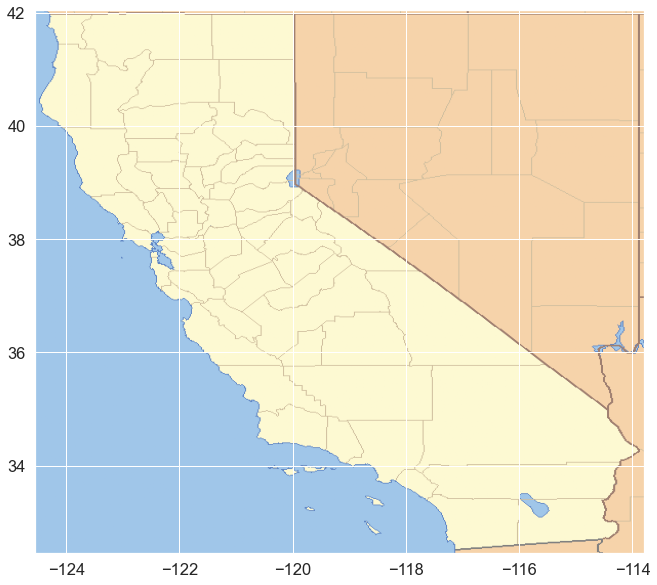

In [19]:
#That's California, right?
#We have a photo of it. Let's add it to our plot.
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")
plt.figure(figsize = (15, 10))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.show()

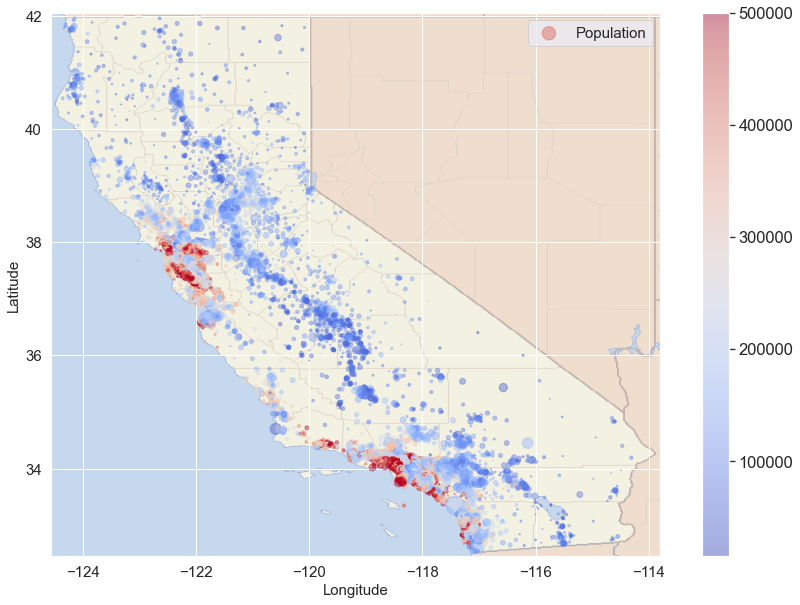

In [20]:
#Now we can plot both the scatter plot and the image together.
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', s = df['population']/100, c = df['median_house_value'], cmap = 'coolwarm',
figsize = (15,10), fontsize = 15, colorbar = True, alpha = 0.4, sharex = False, label = 'Population')


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.5, cmap = plt.get_cmap('jet'))

plt.ylabel('Latitude', fontsize = 15)

plt.xlabel('Longitude', fontsize = 15)

plt.legend(fontsize = 15)

plt.show()

In [22]:
#In the preview plot, we can see that houses that are nearly the ocean are the most expensive.
prox = df.ocean_proximity.unique()
print(prox)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [25]:
df_loc = df[df.ocean_proximity ==prox[3]].copy()

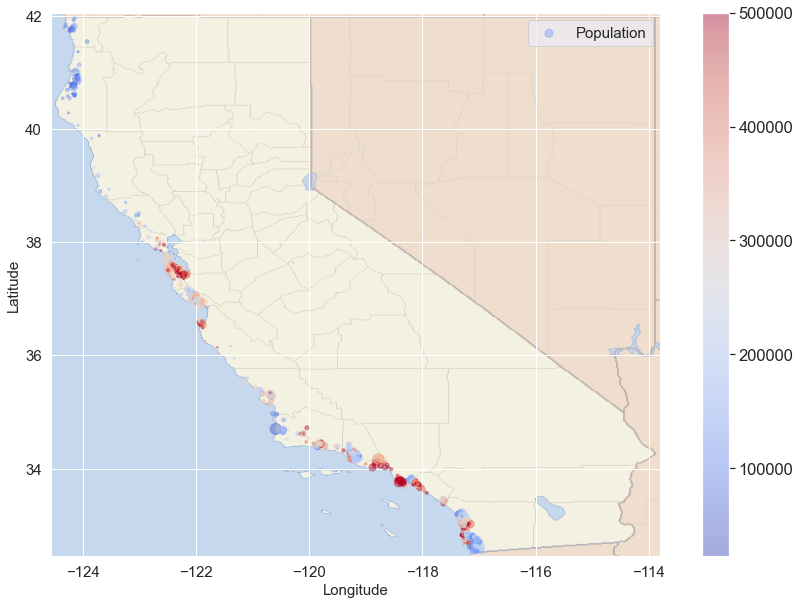

In [26]:
df_loc.plot(kind = 'scatter', x = 'longitude', y = 'latitude', s = df_loc['population']/100, c = df_loc['median_house_value'], cmap = 'coolwarm',
figsize = (15,10), fontsize = 15, colorbar = True, alpha = 0.4, sharex = False, label = 'Population')


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.5, cmap = plt.get_cmap('jet'))

plt.ylabel('Latitude', fontsize = 15)

plt.xlabel('Longitude', fontsize = 15)

plt.legend(fontsize = 15)

plt.show()

## Advanced Explanatory Data Analyis with Seaborn

<AxesSubplot:>

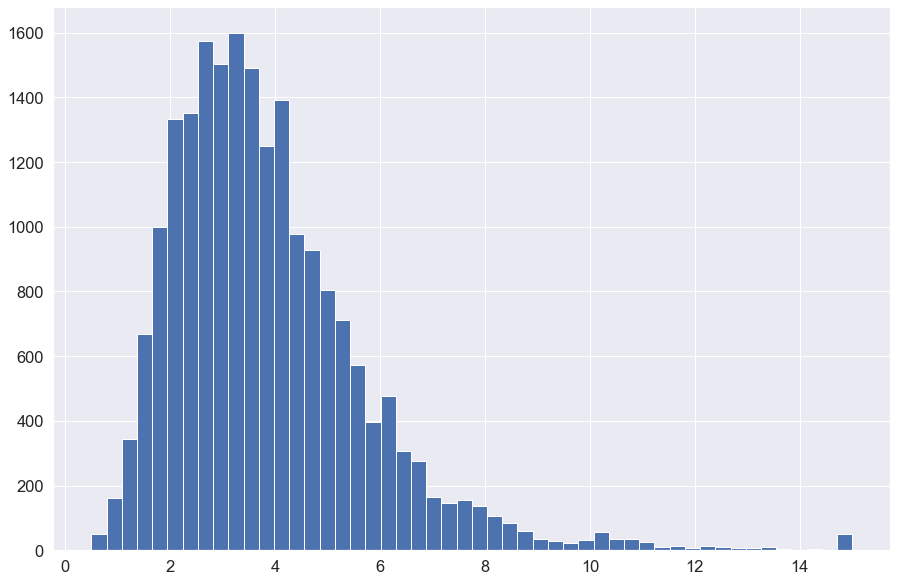

In [27]:
df.median_income.hist(bins = 50, figsize = (15,10))

In [28]:
#Adding "income_cat" column as :
#- lowest 25% -> "Low"
#- 25th to 50th percentile -> "Below_Average"
#- 50th to 75th percentile -> "Above_Average"
#- 75th to 95th percentile -> "High"
#- Above 95th percentile -> "Very High"

pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75,0.95, 1])

df['income_cat'] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75,0.95, 1], 
labels = ['Low', 'Below_Average', 'Above_Average', 'High', 'Very High'])

In [29]:
df.income_cat

0            Very High
1            Very High
2                 High
3                 High
4        Above_Average
             ...      
20635              Low
20636              Low
20637              Low
20638              Low
20639              Low
Name: income_cat, Length: 20433, dtype: category
Categories (5, object): ['Low' < 'Below_Average' < 'Above_Average' < 'High' < 'Very High']

In [32]:
df.income_cat.value_counts(normalize=True)

Low              0.250037
Above_Average    0.250037
Below_Average    0.249988
High             0.199922
Very High        0.050017
Name: income_cat, dtype: float64

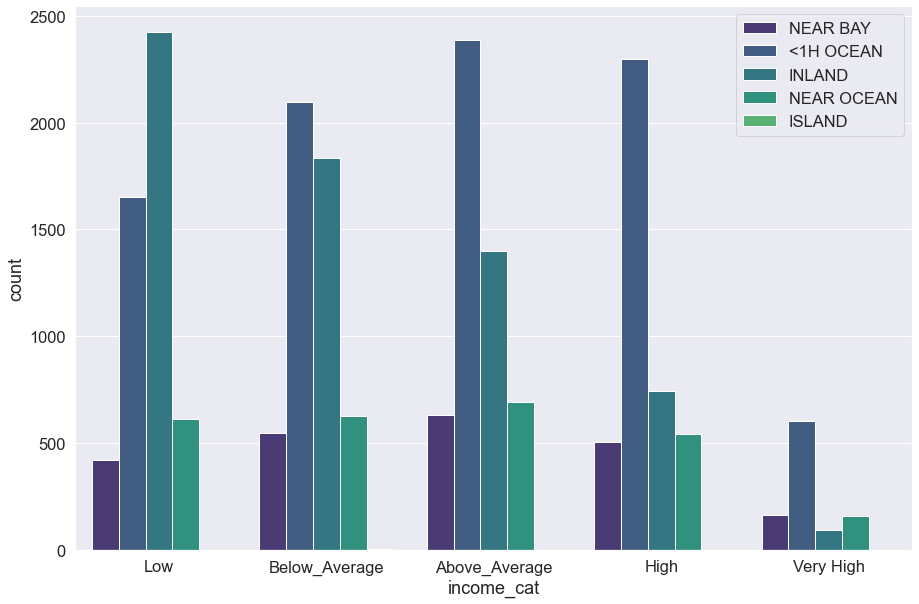

In [33]:
#In this part we use seaborn to create a countplot of the income_cat column.
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5, palette = 'viridis')
sns.countplot(x = 'income_cat', data = df, hue = 'ocean_proximity')
plt.legend(loc = 1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


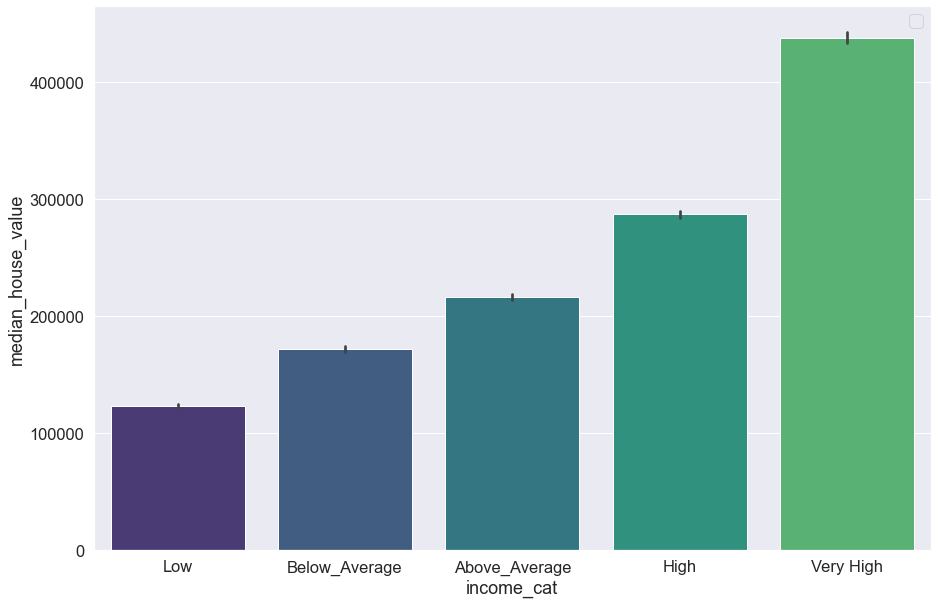

In [34]:
#In this part we use seaborn to create a barplot of the income_cat column.
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5, palette = 'viridis')
sns.barplot(x = 'income_cat', data = df, y = 'median_house_value', dodge=True)
plt.legend(loc = 1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


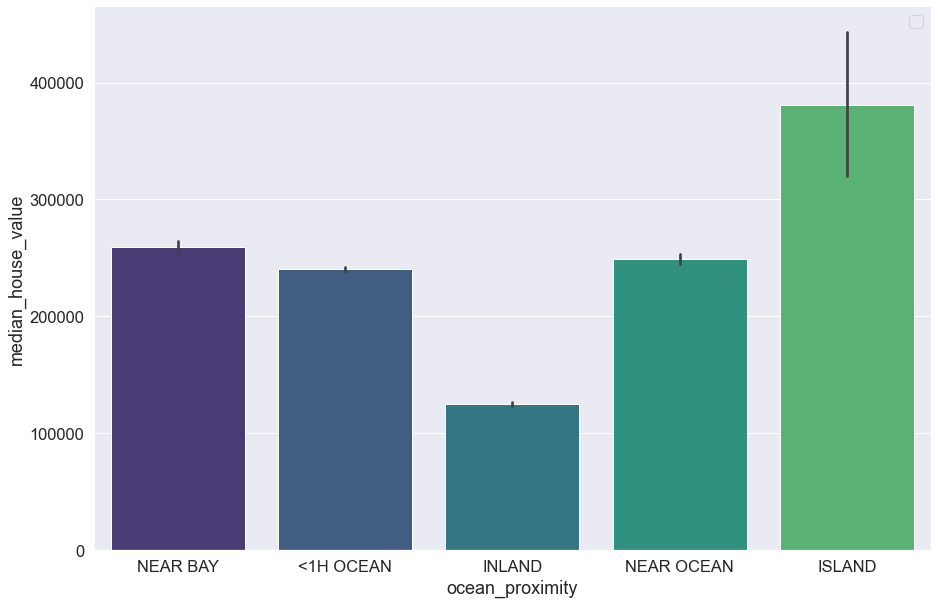

In [35]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5, palette = 'viridis')
sns.barplot(x = 'ocean_proximity', data = df, y = 'median_house_value', dodge=True)
plt.legend(loc = 1)
plt.show()

In [36]:
matrix = df.groupby(['income_cat', 'ocean_proximity']).median_house_value.mean().unstack().drop(columns = 'ISLAND')

In [37]:
matrix.astype('int')

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337,84820,155122,148027
Below_Average,197236,115124,220196,208665
Above_Average,232278,147846,261965,255293
High,292208,208095,322566,337446
Very High,439784,347571,451015,468739


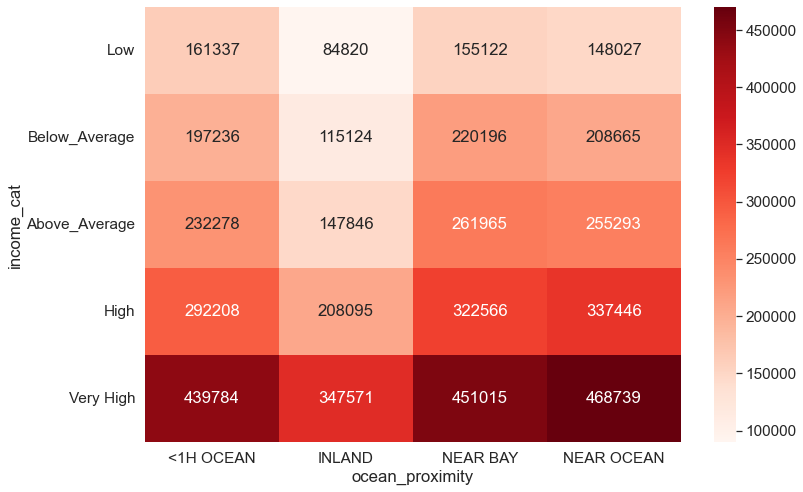

In [41]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.4)
sns.heatmap(matrix.astype('int'), cmap = 'Reds', annot = True, fmt = 'd', vmin = 90000, vmax = 470000)
plt.show()

# Feature Engineering

In [42]:
#Our label will be the median_house_value.
label = df.median_house_value.copy()
label

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [43]:
#An our features are the rest of the columns.
features = df.drop(columns = ['median_house_value'])

In [44]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20433 non-null  float64 
 1   latitude                  20433 non-null  float64 
 2   housing_median_age        20433 non-null  float64 
 3   total_rooms               20433 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20433 non-null  float64 
 6   households                20433 non-null  float64 
 7   median_income             20433 non-null  float64 
 8   ocean_proximity           20433 non-null  object  
 9   rooms_per_houshold        20433 non-null  float64 
 10  population_per_household  20433 non-null  float64 
 11  bedrooms_per_room         20433 non-null  float64 
 12  income_cat                20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory 

In [46]:
#We select features that are numeric.
features.select_dtypes('float')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_houshold,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,2.123209,0.219892


In [47]:
import scipy.stats as stats

feat1 = features.select_dtypes('float').apply(lambda x: stats.zscore(x))
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_houshold,population_per_household,bedrooms_per_room
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-1.146024
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.987254
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-1.440514
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.492925
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.706141
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.199820
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.037412
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.036808
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.118204


In [48]:
#Only with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

In [49]:
feat1.agg(['mean', 'std'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_houshold,population_per_household,bedrooms_per_room
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Machine Learning - Predicting House Values

Based on the Explanatory Data Analysis, <br>
- select an appropriate ML Model (e.g. Linear Regression or RandomForest Regression)
- split into Train and Test Set
- prepare/engineer Features
- Fit the Model (Train Set)
- Test the Model (Test Set)

# +++++++++ See some Hints below +++++++++++++

# ++++++++++++++++ Hints++++++++++++++++++++

__Hints for 10.__<br>
Use pd.qcut()